In [1]:
%matplotlib inline
import os.path as op
from pbcore.io import *
from PRmm.io import *
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)

Here is a lambda run from Austin:

http://milhouse01/project/1307/

One run to single out, for no particular reason: job 238588.








In [4]:
!pbls 238588

/mnt/secondary/iSmrtanalysis/userdata/jobs/238/238588


In [94]:
reportsFolder="/mnt/LIMS/vol70/3020232/0003/DefaultP2B_t2p150809_up7p0"
runPath=op.dirname(reportsFolder)

trcFnames = !find {runPath} -name "*.trc.h5"
trcFname = trcFnames[0]

basFnames =  !find {reportsFolder} -name "*.bas.h5"
basFname = basFnames[0]

cmpFname = "/mnt/secondary/iSmrtanalysis/userdata/jobs/238/238588/data/aligned_reads.cmp.h5"

print basFname

/mnt/LIMS/vol70/3020232/0003/DefaultP2B_t2p150809_up7p0/m150817_140657_Mil_p1_b0.bas.h5


In [112]:
trcF = TrxH5Reader(trcFname)
alnF = CmpH5Reader(cmpFname)
basF = BasH5Reader(basFname)

# Find some ZMWs of interest (have sequence and even alignments!)
goodZmws = sorted(set.intersection(set(trcF.holeNumbers), set(alnF.HoleNumber)))

open("whitelist", "w").writelines(str(hn) + "\n" for hn in goodZmws[:100])

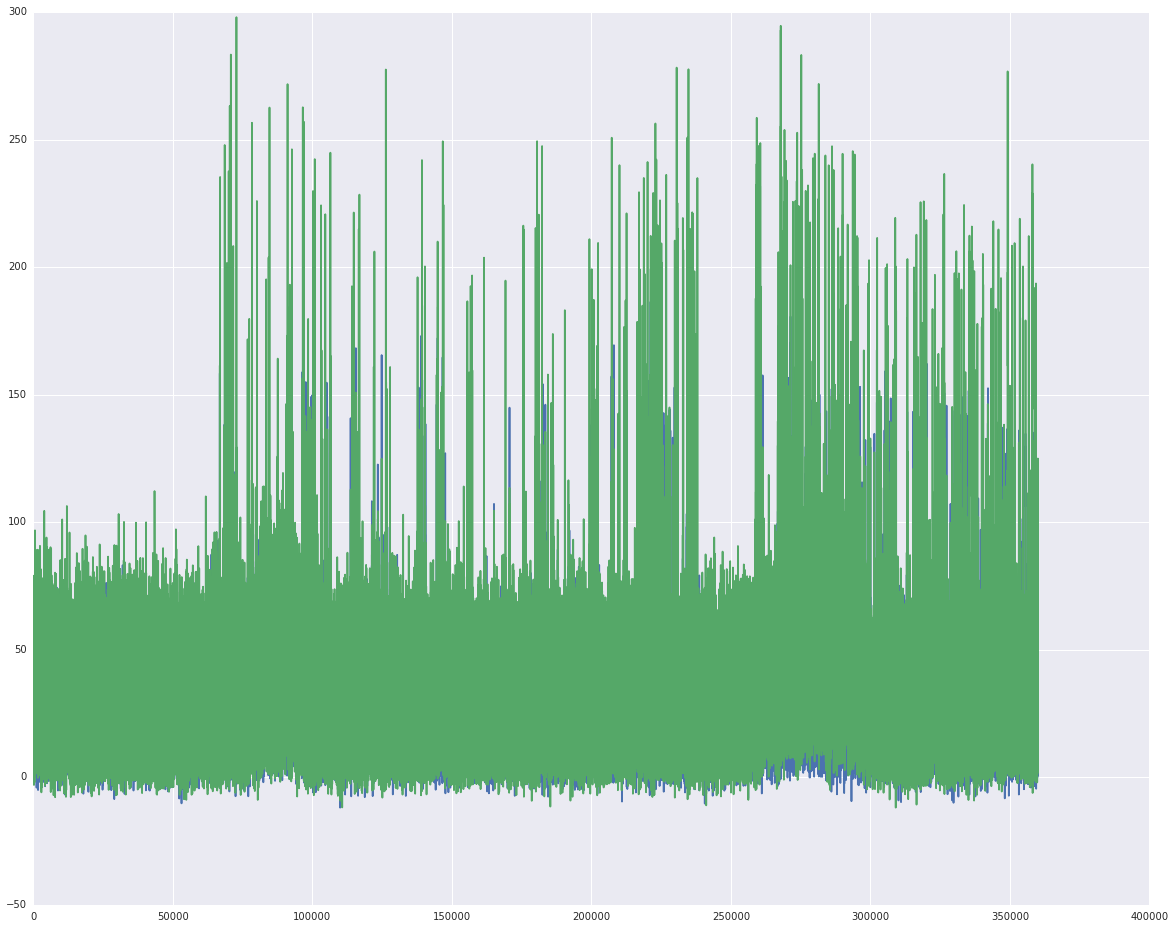

In [75]:
holeNumber = 4934
t = trcF[holeNumber]

plt.plot(np.transpose(t));

In [9]:
alnF[4934]

CmpH5 alignment: +    1      10993      12148

In [10]:
t.shape

(2, 360000)

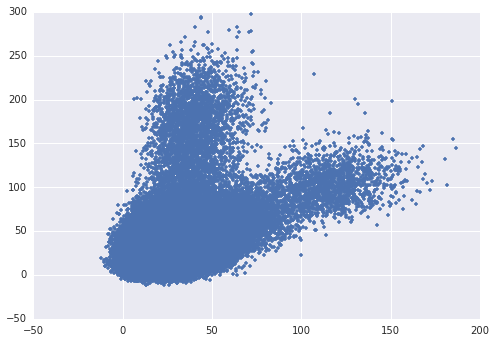

In [12]:
plt.plot(t[0,:], t[1,:], ".");

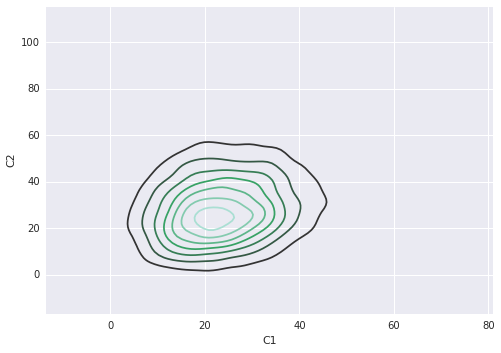

In [34]:
df = pd.DataFrame(np.transpose(t), columns=["C1", "C2"])

#sns.jointplot(x="C1", y="C2", data=df[0:12000], kind="kde");

interval = slice(0, 12000)
sns.kdeplot(df[interval].C1, df[interval].C2 )

Goal: show density plots for every 60 second window in the trace!

In [98]:
# Some capabilites to get info about aln by frames
from bisect import bisect_left, bisect_right

def alnsByHoleNumber(alnF, holeNumber):
    return alnF[alnF.HoleNumber == holeNumber]

def baseIntervalByFrameInterval(zmw, beginFrame, endFrame):
    read = zmw.readNoQC()
    baseEndFrame = np.cumsum(read.PreBaseFrames() + read.WidthInFrames())
    baseStartFrame = baseEndFrame - read.WidthInFrames()
    # beginBase: first base at least partly in the frame interval,
    #           so first base whose end is after the specificed beginFrame
    # endBase: last base at least partly in the frame interval,
    #          so last base whose start is before the specified endFrame
    beginBase = bisect_left(baseEndFrame, beginFrame)
    endBase   = bisect_right(baseStartFrame, endFrame)
    return (beginBase, endBase)

def alnsByBaseInterval(alnF, zmw, beginBase, endBase):
    pass
    
def alnsByHoleNumberAndTimeWindow(alnF, basF, holeNumber, frameSpan):
    zmw = basF[holeNumber]
    al


alns = alnsByHoleNumber(alnF, goodZmws[1])
[a.readName for a in alns]
a = alns[0]


zmw = basF[holeNumber]
baseIntervalByFrameInterval(zmw, 0, 1000000)

(0, 4190)

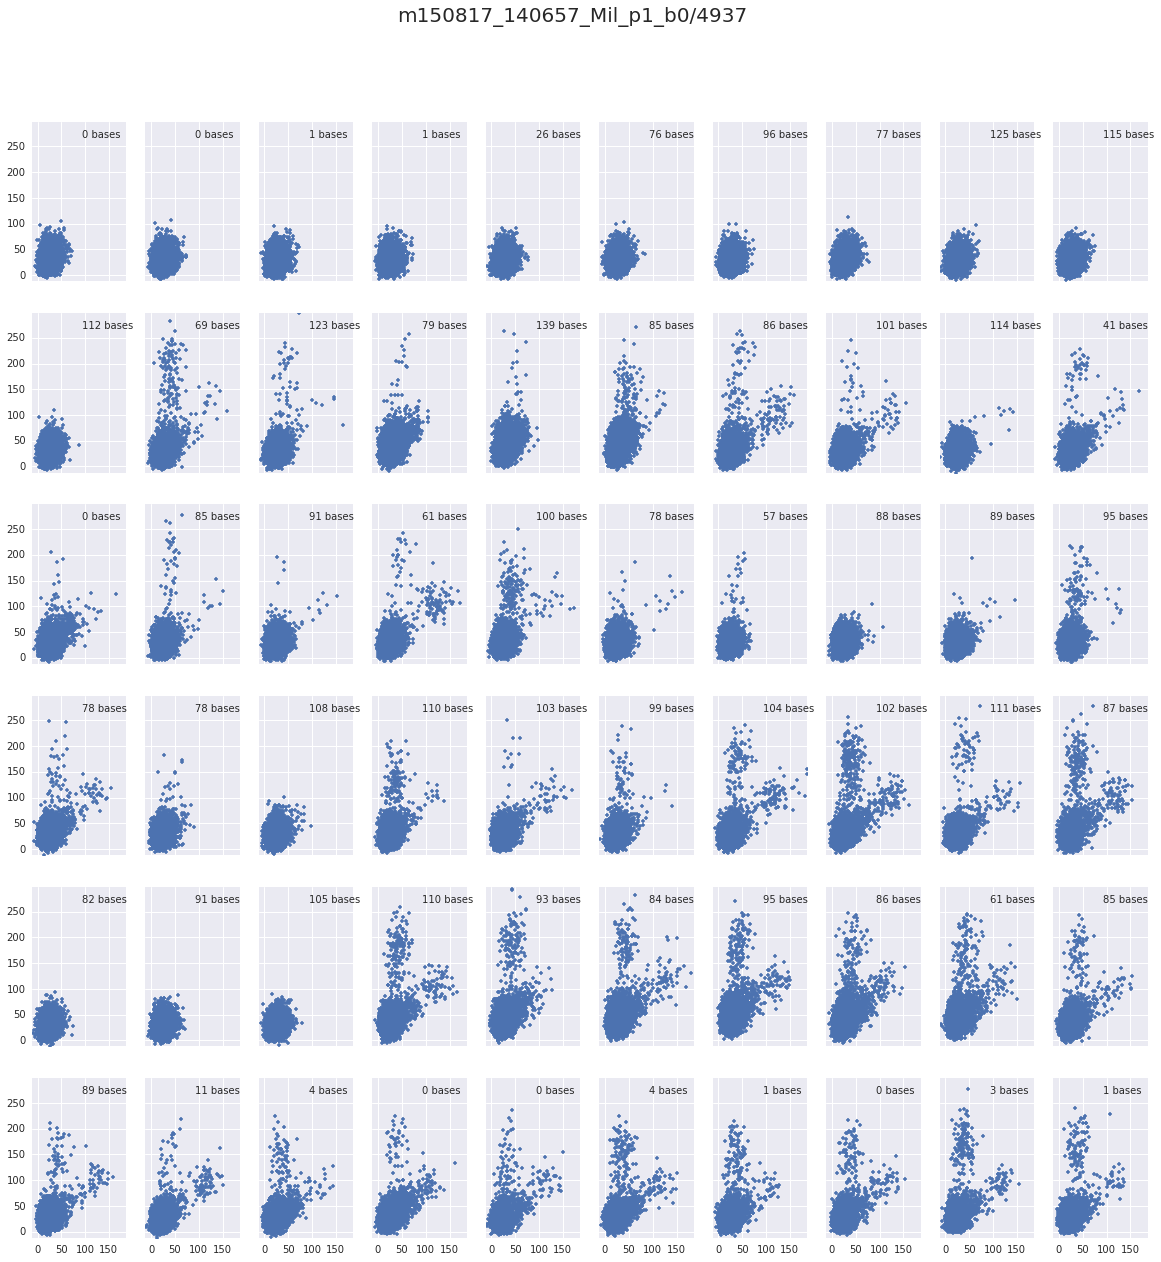

In [104]:
frameRate = 100  # TODO: provide accessor
intervalFrames = 60 * frameRate
holeNumber = goodZmws[1]
zmw = basF[holeNumber]

matplotlib.rcParams['figure.figsize'] = np.array([10, 10])*2

fig, ax = plt.subplots(6, 10, sharex=True, sharey=True, )
fig.suptitle(trcF.movieName + "/" + str(holeNumber), fontsize=20)
axr = ax.ravel()

# what is the extent of the data?
xmin, ymin = df.min()
xmax, ymax = df.max()

# 60 plots, 1 per minute
for i in xrange(60):
    interval = slice(i*intervalFrames, (i+1)*intervalFrames)
#   #sns.kdeplot(df.C1[interval], df.C2[interval])
    axr[i].set_xlim(xmin, xmax)
    axr[i].set_ylim(ymin, ymax)
    axr[i].plot(df.C1[interval], df.C2[interval], ".")

    baseInterval = baseIntervalByFrameInterval(zmw, interval.start, interval.stop)
    axr[i].text(xmax*0.5, ymax*0.9, "%d bases" %  (baseInterval[1] - baseInterval[0]))


# TODO: add "{X} bases aligned @ 75% acc"

In [100]:
axr[0].text(100, 200, "FOOBAR")

In [30]:


slice(1,12)















slice(1, 12, None)